<a href="https://colab.research.google.com/github/suryatejaganji/DATA-ANALYSIS-USING-PYTHON/blob/main/Week_7_Tuesday_9_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

# Parameters for the Binomial distribution
n = 100  # Number of deliveries (trials)
p = 0.60 # Probability of an on-time delivery (success)

# Simulate the number of on-time deliveries
simulated_on_time_deliveries = np.random.binomial(n, p, size=1)

print(f"Simulated number of on-time deliveries out of {n} packages: {simulated_on_time_deliveries[0]}")

Simulated number of on-time deliveries out of 100 packages: 58


In [11]:
from scipy.stats import binom

print("Imported binom from scipy.stats")

Imported binom from scipy.stats


In [12]:
n = 100
p = 0.60

k = np.arange(0, n + 1) # Possible outcomes from 0 to n
pmf = binom.pmf(k, n, p)

# Theoretical mean
mean_binomial = n * p

# Theoretical variance
variance_binomial = n * p * (1 - p)

# Mode of the binomial distribution
# The mode is floor((n+1)*p). If (n+1)*p is an integer, there are two modes: (n+1)*p - 1 and (n+1)*p.
mode_val = (n + 1) * p
if mode_val == int(mode_val):
    mode_binomial = [int(mode_val - 1), int(mode_val)]
else:
    mode_binomial = int(np.floor(mode_val))

print(f"Number of trials (n): {n}")
print(f"Probability of success (p): {p}")
print(f"Theoretical Mean of Binomial Distribution: {mean_binomial:.2f}")
print(f"Theoretical Variance of Binomial Distribution: {variance_binomial:.2f}")
print(f"Mode(s) of Binomial Distribution: {mode_binomial}")


Number of trials (n): 100
Probability of success (p): 0.6
Theoretical Mean of Binomial Distribution: 60.00
Theoretical Variance of Binomial Distribution: 24.00
Mode(s) of Binomial Distribution: 60


# Task
Compare and analyze Binomial distributions for `n=100` and `p` values of 0.3, 0.6, and 0.9, by calculating their PMFs, theoretical means, variances, and modes, then visualizing these distributions with marked statistics, and finally discussing how the distribution's shape and characteristics shift with varying probabilities of success.

## Generate Binomial PMFs and Statistics for P=0.3, 0.6, 0.9

### Subtask:
Calculate the Probability Mass Function (PMF) and the theoretical mean, variance, and mode for Binomial distributions with n=100 and p values of 0.3, 0.6, and 0.9. Store these values for plotting and analysis.


**Reasoning**:
To fulfill the subtask, I need to iterate through the specified probability values (0.3, 0.6, 0.9), calculate the PMF, theoretical mean, variance, and mode for each, and store them in respective dictionaries for later use. This involves utilizing previously defined 'n' and the 'binom' function from scipy.stats.



In [13]:
p_values = [0.3, 0.6, 0.9]

pmfs = {}
means = {}
variances = {}
modes = {}

print(f"Calculations for n = {n}:")

for p_val in p_values:
    # Possible outcomes from 0 to n
    k = np.arange(0, n + 1)

    # Calculate PMF
    pmf = binom.pmf(k, n, p_val)
    pmfs[p_val] = pmf

    # Theoretical mean
    mean_binomial = n * p_val
    means[p_val] = mean_binomial

    # Theoretical variance
    variance_binomial = n * p_val * (1 - p_val)
    variances[p_val] = variance_binomial

    # Mode of the binomial distribution
    mode_val_check = (n + 1) * p_val
    if mode_val_check == int(mode_val_check):
        mode_binomial = [int(mode_val_check - 1), int(mode_val_check)]
    else:
        mode_binomial = int(np.floor(mode_val_check))
    modes[p_val] = mode_binomial

    print(f"\n  For p = {p_val}:")
    print(f"    Theoretical Mean: {mean_binomial:.2f}")
    print(f"    Theoretical Variance: {variance_binomial:.2f}")
    print(f"    Mode(s): {mode_binomial}")

Calculations for n = 100:

  For p = 0.3:
    Theoretical Mean: 30.00
    Theoretical Variance: 21.00
    Mode(s): 30

  For p = 0.6:
    Theoretical Mean: 60.00
    Theoretical Variance: 24.00
    Mode(s): 60

  For p = 0.9:
    Theoretical Mean: 90.00
    Theoretical Variance: 9.00
    Mode(s): 90


## Plot Comparative Binomial Distributions

### Subtask:
Create a series of bar plots, one for each probability (p=0.3, 0.6, 0.9), showing the Binomial distribution's PMF. On each plot, clearly mark the mean and the mode(s) of the distribution. Ensure proper labels, titles, and a consistent scale for comparison.


**Reasoning**:
The subtask requires plotting the Binomial distributions for different 'p' values (0.3, 0.6, 0.9), marking their means and modes, and ensuring consistent scales. I will use `matplotlib.pyplot` to generate these plots by iterating through the pre-calculated PMFs, means, and modes, then setting appropriate labels, titles, and axis limits.



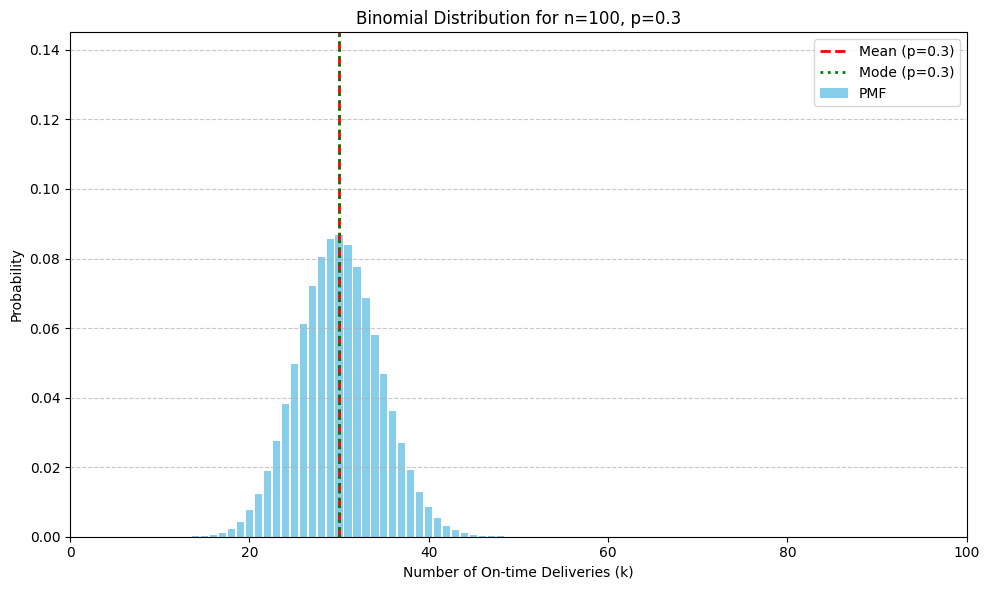

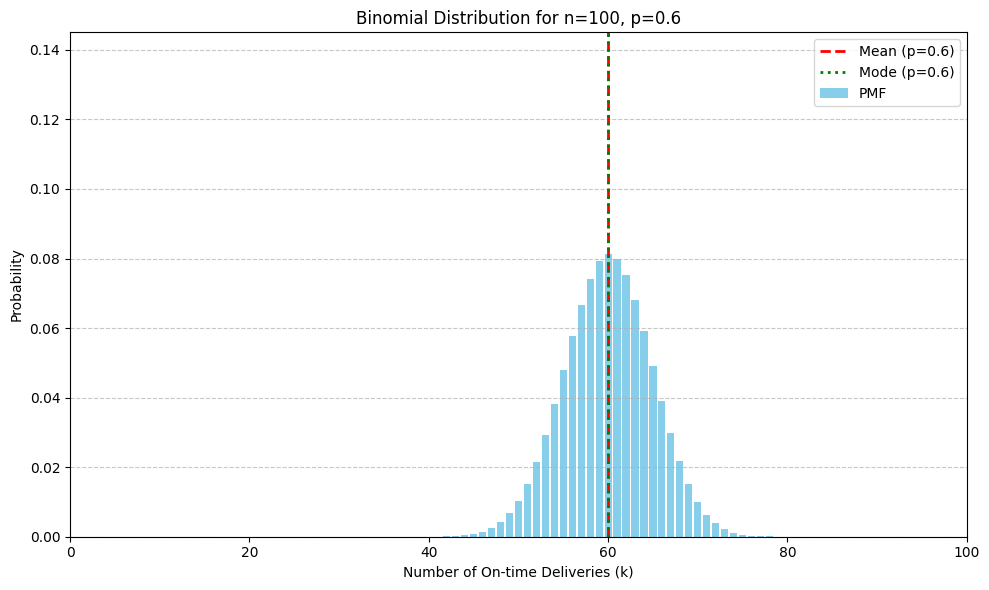

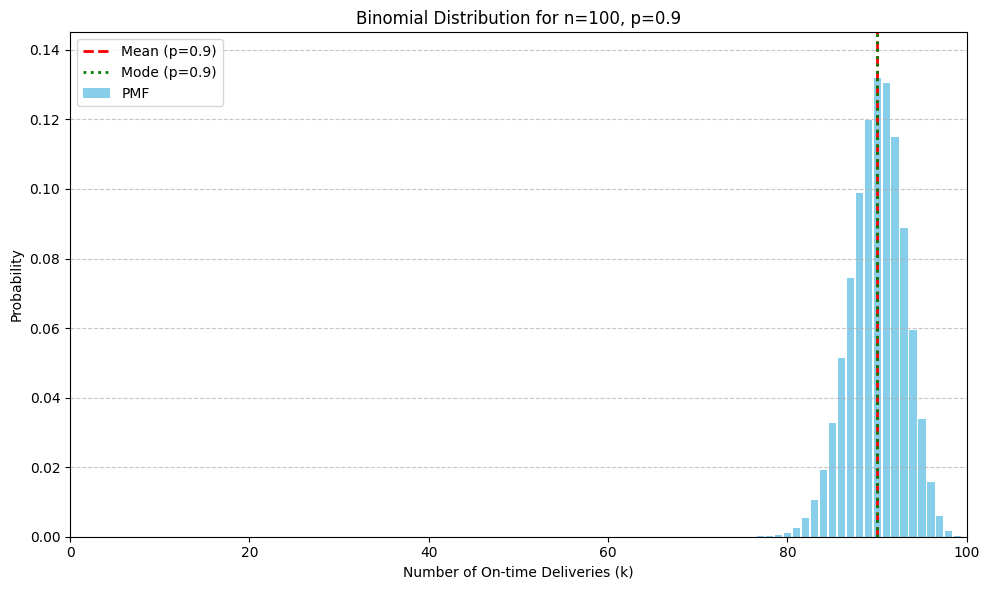

Plots generated for Binomial distributions with p=0.3, 0.6, and 0.9.


In [14]:
import matplotlib.pyplot as plt

# Determine a consistent y-axis limit by finding the maximum PMF value across all distributions
max_pmf_val = 0
for p_val in p_values:
    max_pmf_val = max(max_pmf_val, np.max(pmfs[p_val]))

# Add a small buffer to the max_pmf_val for better visualization
y_lim_max = max_pmf_val * 1.1

for p_val in p_values:
    plt.figure(figsize=(10, 6))
    plt.bar(k, pmfs[p_val], label='PMF', color='skyblue')

    # Mark the mean
    mean_val = means[p_val]
    plt.axvline(x=mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean (p={p_val})')

    # Mark the mode(s)
    mode_vals = modes[p_val]
    if isinstance(mode_vals, list):
        for mode_v in mode_vals:
            plt.axvline(x=mode_v, color='green', linestyle=':', linewidth=2, label=f'Mode (p={p_val})')
    else:
        plt.axvline(x=mode_vals, color='green', linestyle=':', linewidth=2, label=f'Mode (p={p_val})')

    plt.xlabel('Number of On-time Deliveries (k)')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution for n={n}, p={p_val}')
    plt.xlim(0, n)  # Consistent x-axis limits
    plt.ylim(0, y_lim_max) # Consistent y-axis limits
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("Plots generated for Binomial distributions with p=0.3, 0.6, and 0.9.")